In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
craig_data=pd.read_csv("/kaggle/input/craiglist-dataset/craigslist_vehicles.csv")

In [3]:
# List of columns to remove
columns_to_remove = ['county', 'id', 'url', 'region', 'region_url', 'image_url', 'lat', 'size', 'long']
# Drop the specified columns
craig_data = craig_data.drop(columns=columns_to_remove)

In [4]:
# Replace missing values with median for numerical columns
numerical_columns = craig_data.select_dtypes(include=['int64', 'float64'])
craig_data[numerical_columns.columns] = craig_data[numerical_columns.columns].fillna(craig_data[numerical_columns.columns].median())

# Replace missing values with mode for categorical columns
categorical_columns = craig_data.select_dtypes(include=['object'])
for column in categorical_columns.columns:
    craig_data[column].fillna(craig_data[column].mode()[0], inplace=True)

# Convert the 'posting_date' column to datetime
craig_data['posting_date'] = pd.to_datetime(craig_data['posting_date'])

# Set 'posting_date' as the index
craig_data.set_index('posting_date', inplace=True)

In [5]:
craig_data.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,description,state,removal_date
posting_date,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00+00:00,362773,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-05-02 00:00:00+00:00
2021-04-24 00:00:00+00:00,362712,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,2021-04-28 00:00:00+00:00
2021-04-23 00:00:00+00:00,362722,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,1FMJU1JT1HEA52352,fwd,sedan,silver,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,2021-05-25 00:00:00+00:00
2021-04-16 00:00:00+00:00,362771,6500,2008.0,ford,expedition,good,6 cylinders,gas,206000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,2021-04-26 00:00:00+00:00
2021-04-24 00:00:00+00:00,362710,6500,2008.0,ford,expedition,good,6 cylinders,gas,206000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,sedan,white,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,2021-05-12 00:00:00+00:00


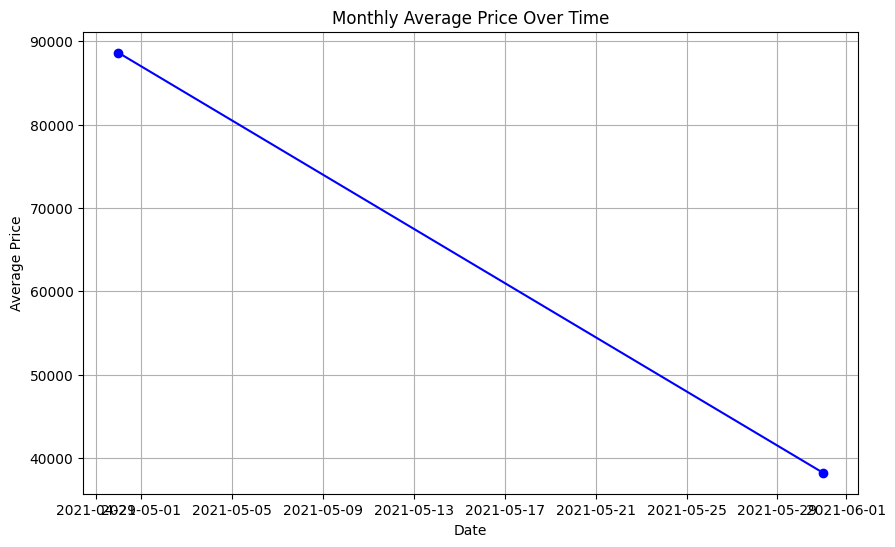

In [6]:
import matplotlib.pyplot as plt

# Resample the data to aggregate it by month and calculate the mean price
monthly_avg_price = craig_data['price'].resample('M').mean()

# Create the time-series plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Monthly Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)

# Show the plot
plt.show()